There are 25 variables:

# ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

importing the liberies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\sajal\Downloads\archive (3).zip",encoding= 'unicode_escape')

EDA processing

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.drop(['ID'],axis=1,inplace=True)

In [9]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [12]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [13]:
df.rename(columns={'default.payment.next.month':'def_pay'},inplace=True)

In [14]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [15]:
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [16]:
df['def_pay'].unique()

array([1, 0], dtype=int64)

In [17]:
df['def_pay'].value_counts()

def_pay
0    23364
1     6636
Name: count, dtype: int64

In [18]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [19]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [20]:
education=(df.EDUCATION==5)|(df.EDUCATION==6)|(df.EDUCATION==0)
df.loc[education,'EDUCATION']==4

47       False
69       False
385      False
502      False
504      False
         ...  
29811    False
29836    False
29839    False
29920    False
29966    False
Name: EDUCATION, Length: 345, dtype: bool

In [21]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [22]:
marriage=(df.MARRIAGE==0)
df.loc[marriage,'MARRIAGE']==3

218      False
809      False
820      False
1019     False
1443     False
2146     False
2554     False
3056     False
4470     False
5005     False
5345     False
6389     False
7940     False
7955     False
8886     False
9088     False
9973     False
10208    False
11752    False
11925    False
12050    False
12078    False
12732    False
13825    False
16581    False
17285    False
17529    False
17576    False
18306    False
18535    False
18948    False
19342    False
19386    False
20119    False
20449    False
21559    False
22590    False
23029    False
23103    False
23135    False
23360    False
24216    False
24443    False
24721    False
24984    False
25308    False
25702    False
26250    False
28457    False
28602    False
28603    False
28766    False
29078    False
29111    False
Name: MARRIAGE, dtype: bool

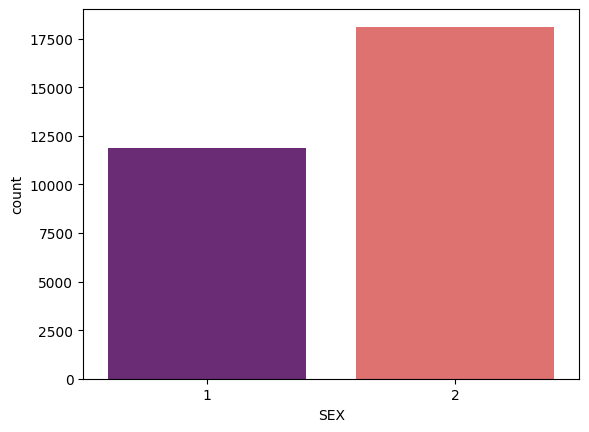

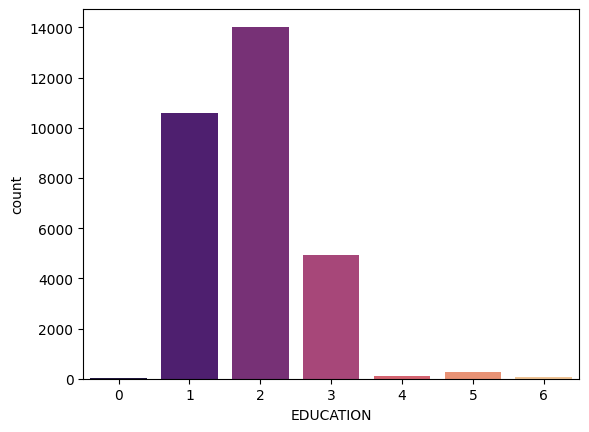

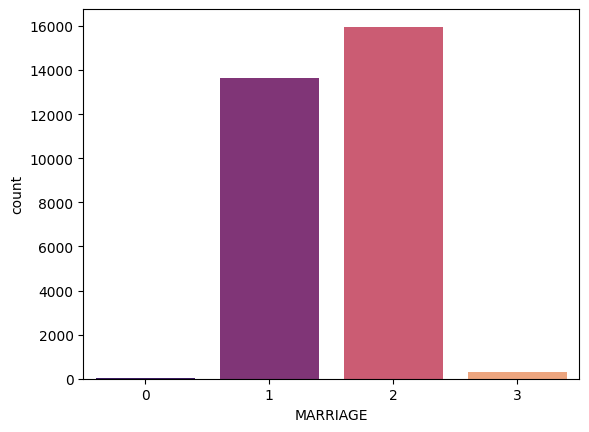

In [23]:
cat_col=['SEX','EDUCATION','MARRIAGE']
for col in cat_col:
    sns.countplot(data=df,x=col,palette='magma')
    plt.show()

Text(0.5, 1.0, 'Heatmap')

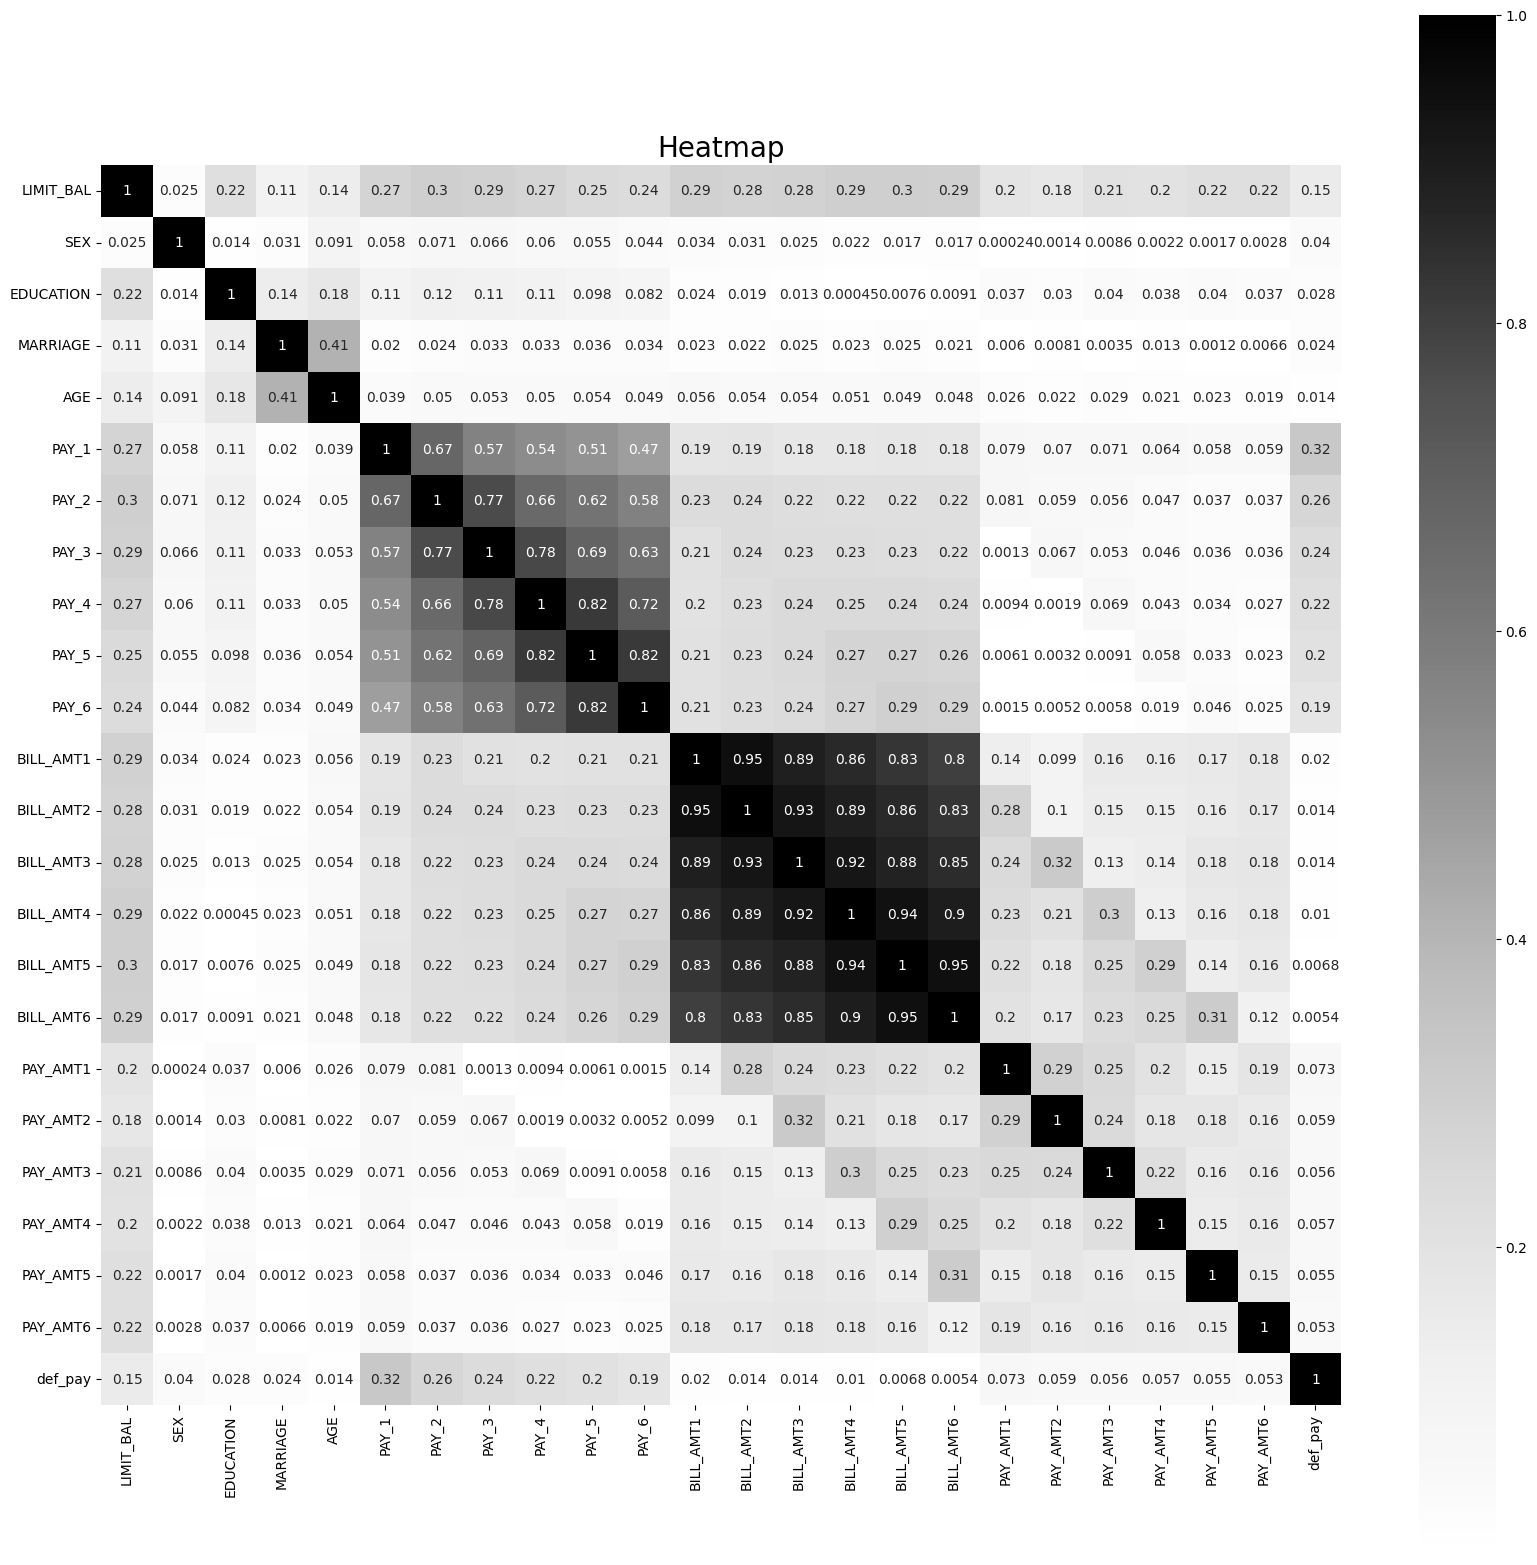

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

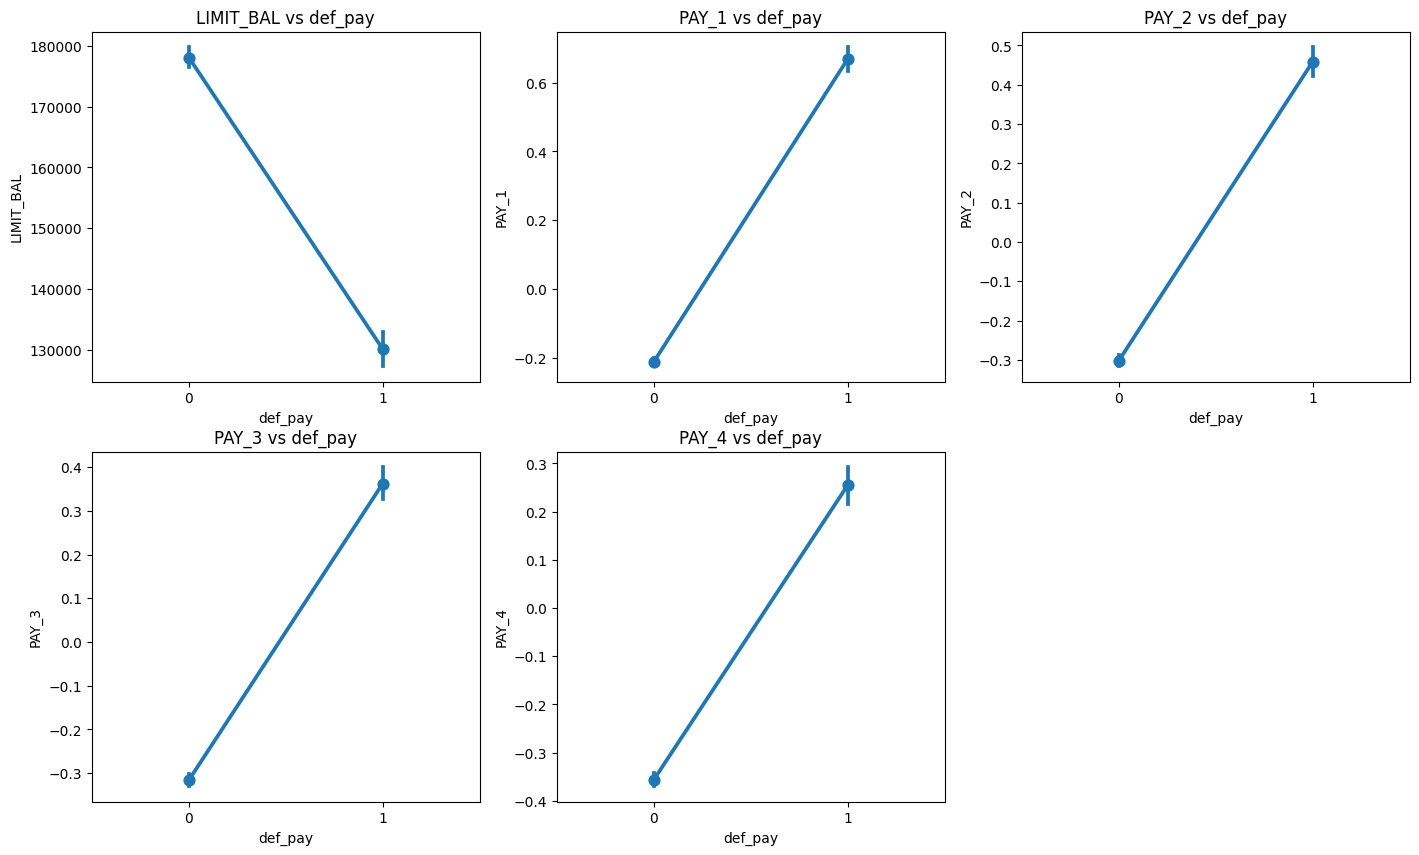

In [25]:

list1=['LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4']
plt.figure(figsize=(17,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='def_pay',y=item,data=df)
  plt.title(f'{item} vs def_pay')

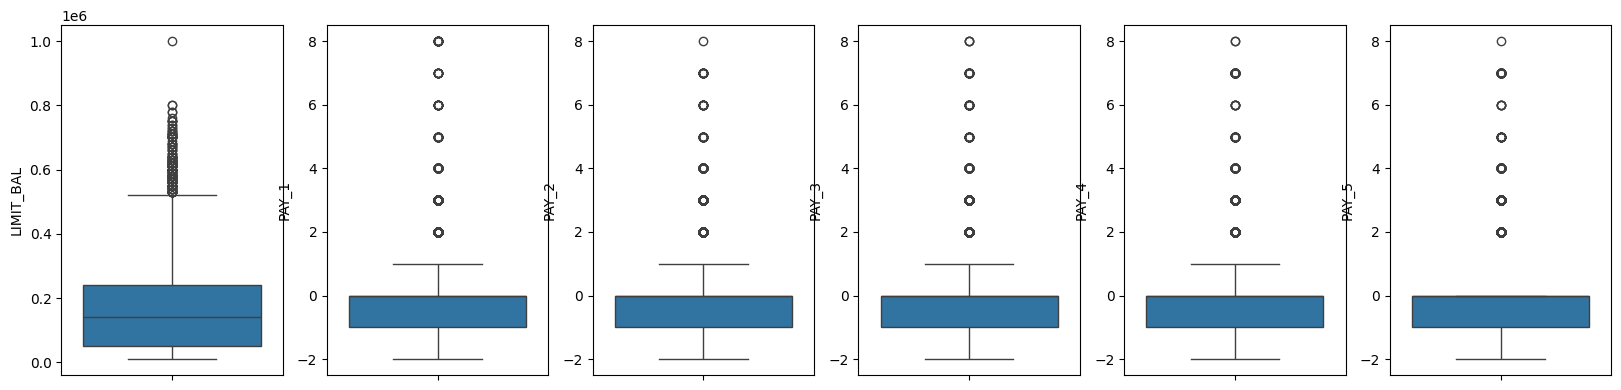

In [26]:
list1=['LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5']
plt.figure(figsize=(20,10))
for index,item in enumerate(list1):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

Text(0.5, 1.0, 'Count of def_pay')

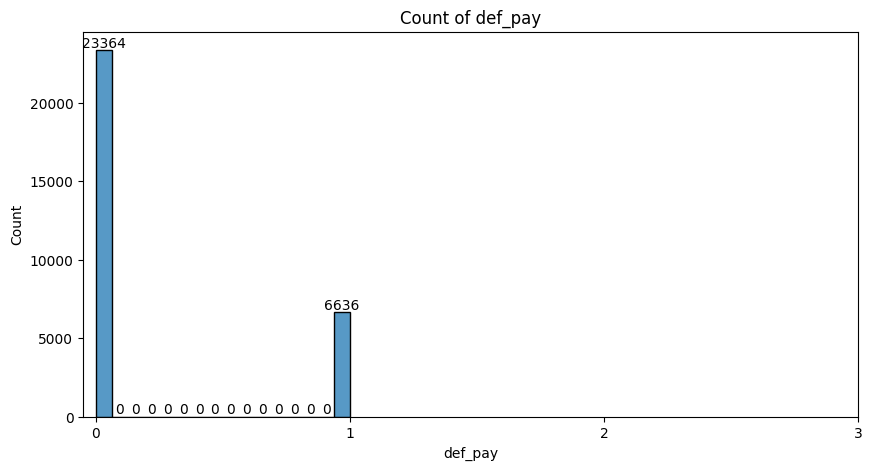

In [27]:
plt.figure(figsize=(10,5))
xtick=[0,1,2,3]
sns.histplot(data=df['def_pay'])
ax = plt.gca()

for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y, f'{int(y)}', ha='center', va='bottom')
plt.xticks(xtick)
plt.title('Count of def_pay')

In [28]:
cat_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['float64','int64'])

In [30]:
from scipy.stats import skew

LIMIT_BAL
0.9928173164820109


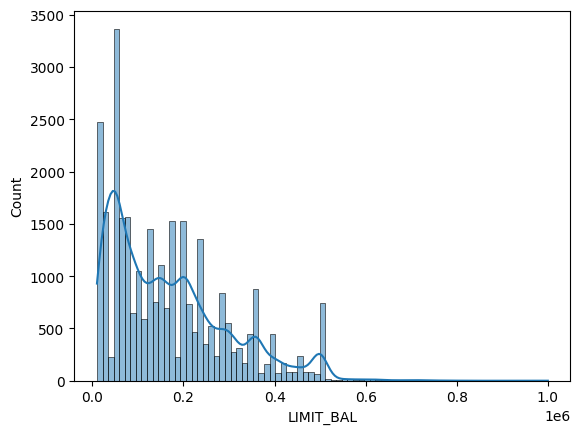

SEX
-0.4241622176497638


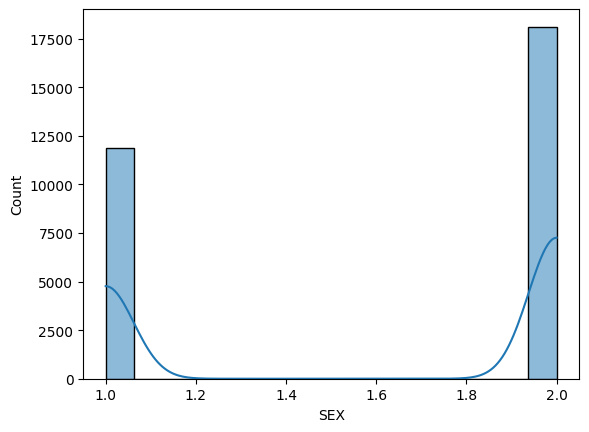

EDUCATION
0.9709234992917573


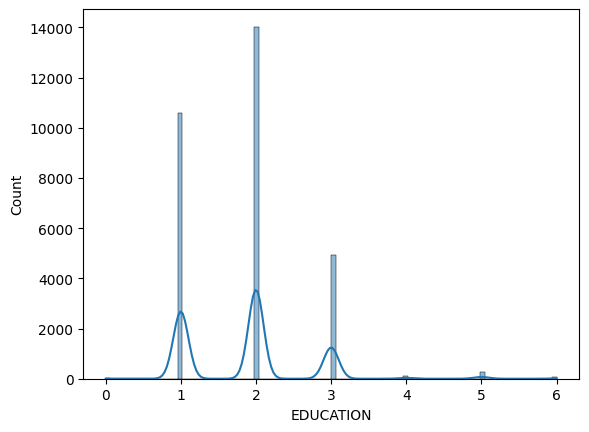

MARRIAGE
-0.01874074391724496


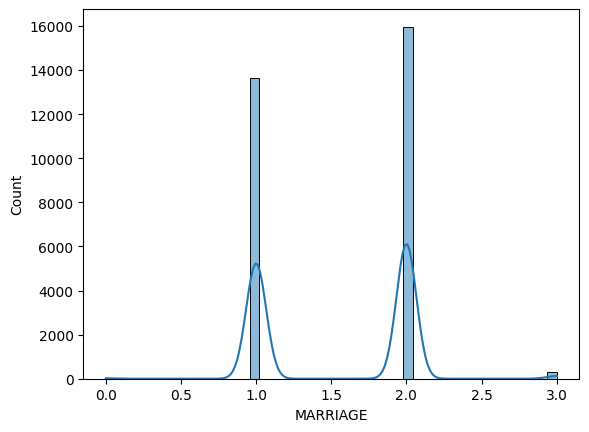

AGE
0.7322092559811012


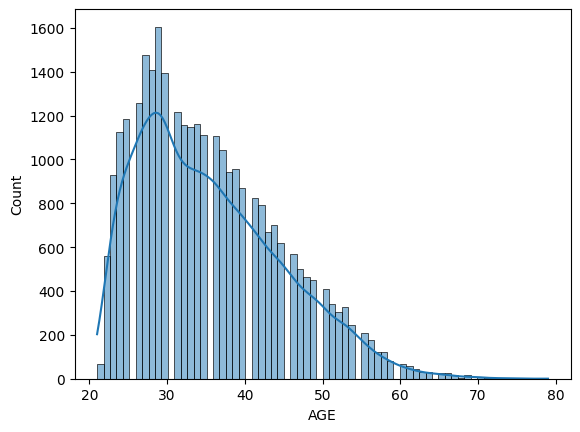

PAY_1
0.7319383276538349


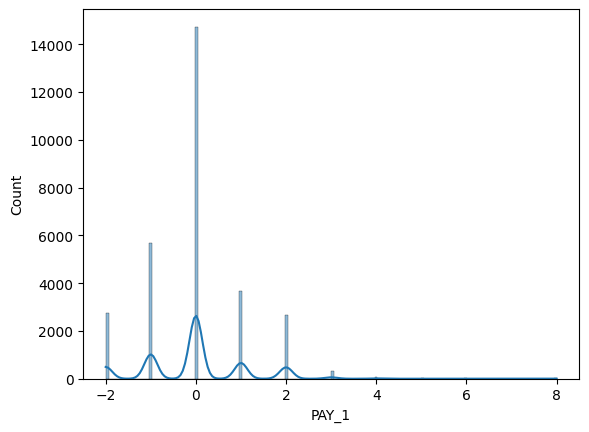

PAY_2
0.7905254934023821


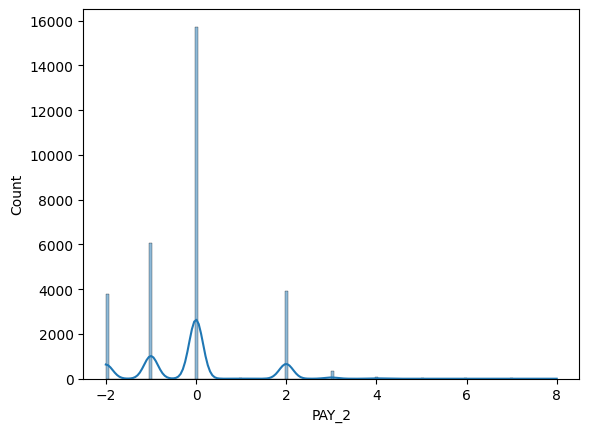

PAY_3
0.8406397922714622


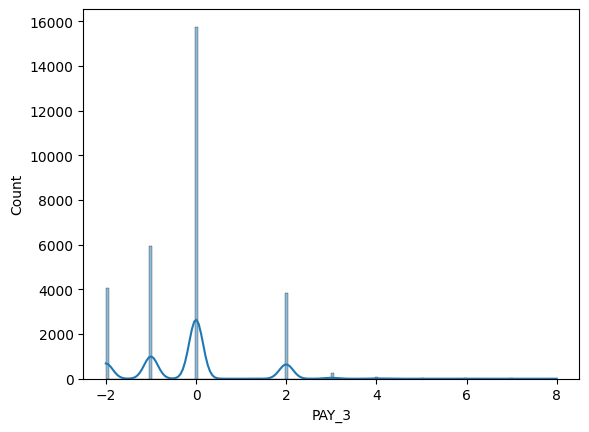

PAY_4
0.9995794311396099


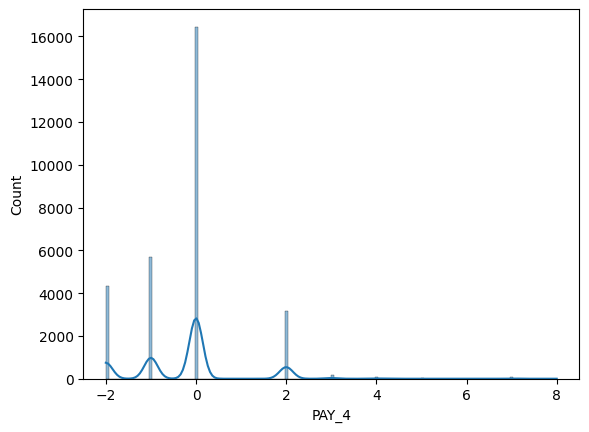

PAY_5
1.0081466145548093


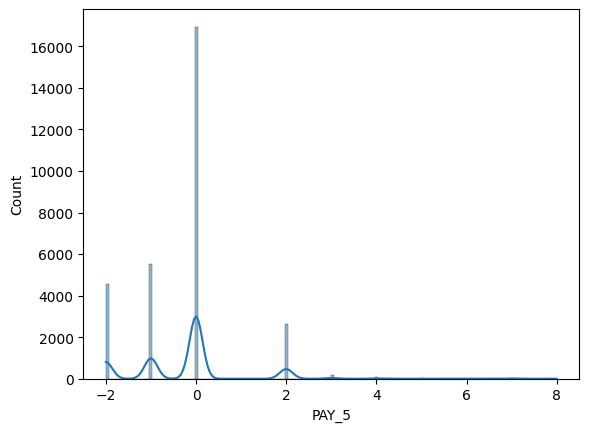

PAY_6
0.947981989427411


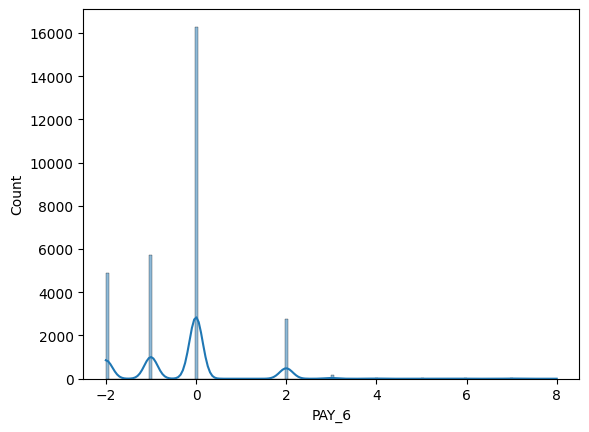

BILL_AMT1
2.6637278271222136


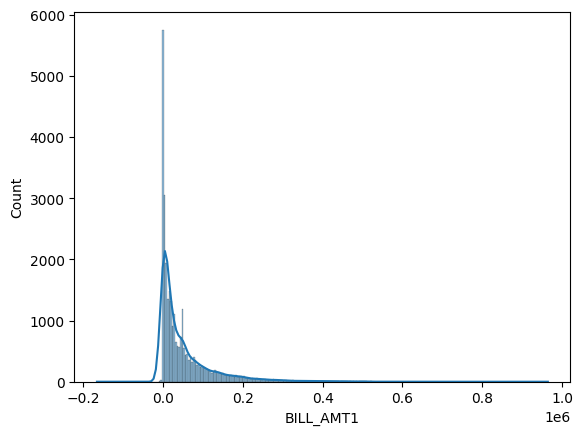

BILL_AMT2
2.7050855904869455


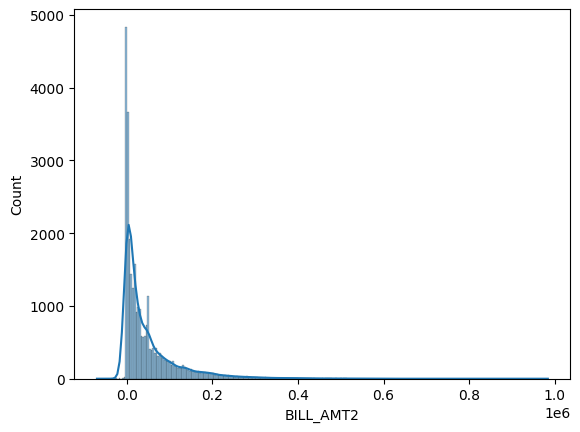

BILL_AMT3
3.087675652554038


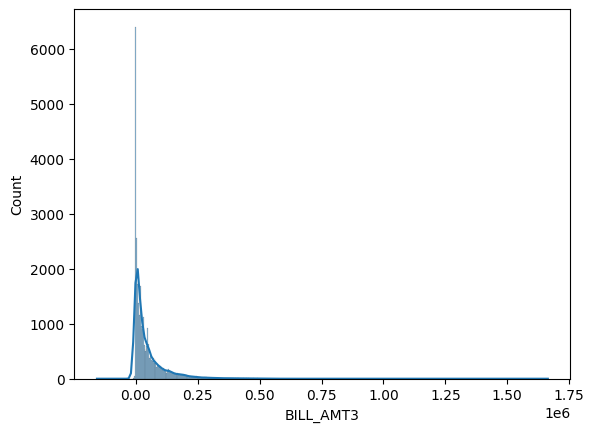

BILL_AMT4
2.821824190578528


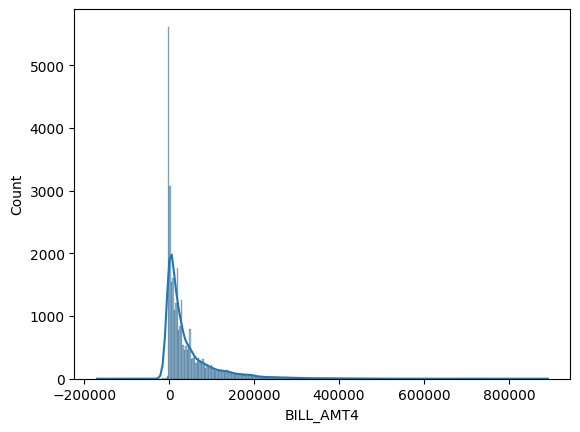

BILL_AMT5
2.876236045711996


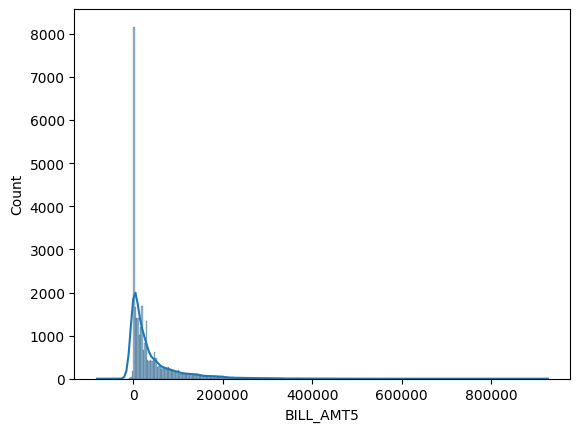

BILL_AMT6
2.846502241454702


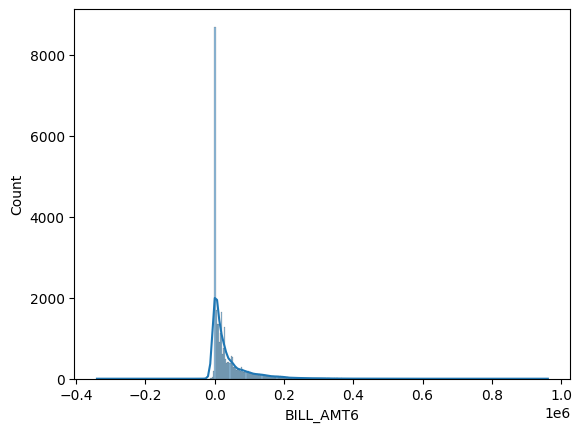

PAY_AMT1
14.667630904439925


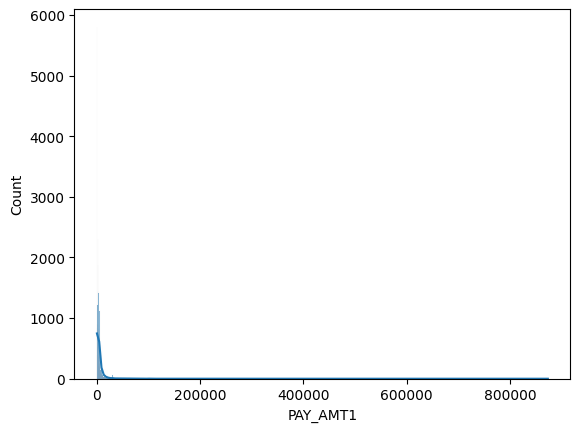

PAY_AMT2
30.452294738147945


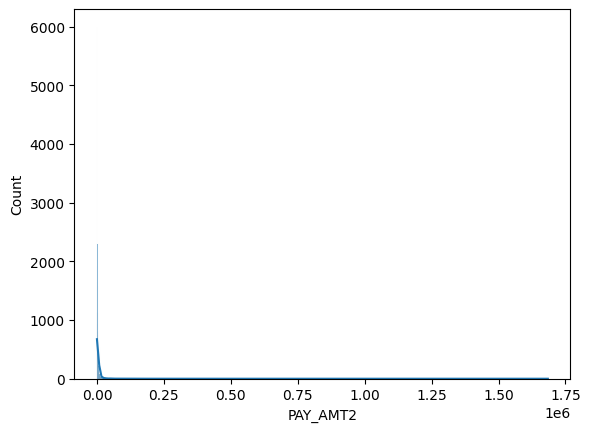

PAY_AMT3
17.215774591401207


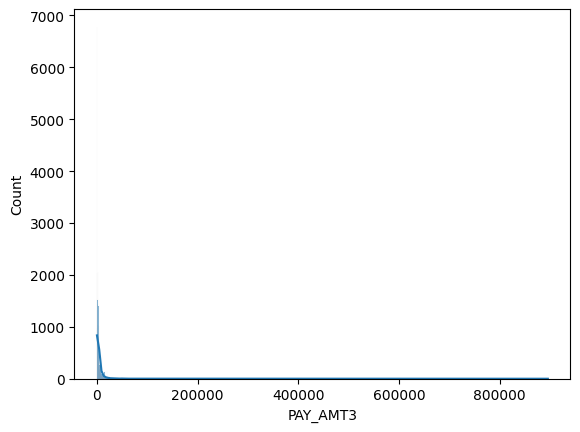

PAY_AMT4
12.904339565339363


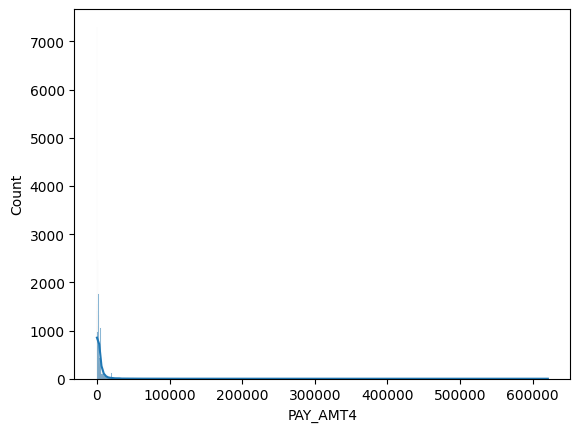

PAY_AMT5
11.126860673593654


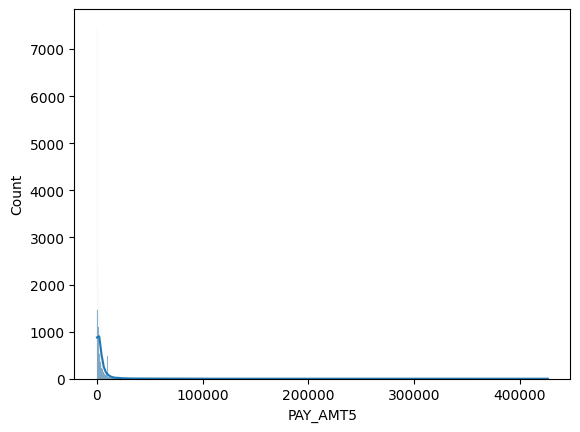

PAY_AMT6
10.640195281288497


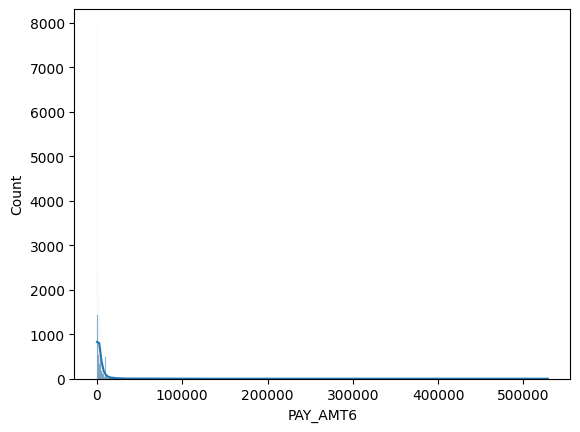

def_pay
1.3434367747652611


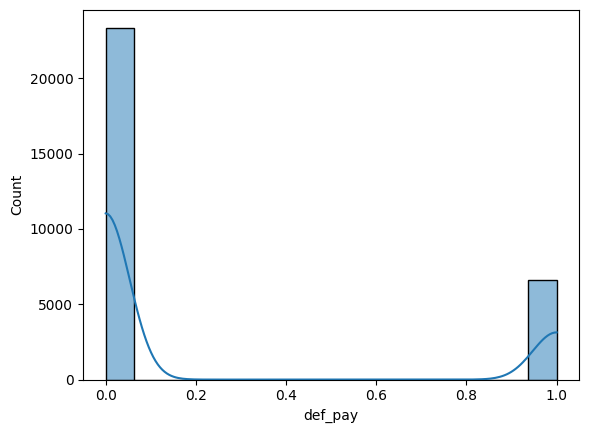

In [31]:
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

In [32]:
df['SEX']=np.sqrt(df['SEX'])

In [33]:
df.skew()

LIMIT_BAL     0.992867
SEX          -0.424183
EDUCATION     0.970972
MARRIAGE     -0.018742
AGE           0.732246
PAY_1         0.731975
PAY_2         0.790565
PAY_3         0.840682
PAY_4         0.999629
PAY_5         1.008197
PAY_6         0.948029
BILL_AMT1     2.663861
BILL_AMT2     2.705221
BILL_AMT3     3.087830
BILL_AMT4     2.821965
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1     14.668364
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
def_pay       1.343504
dtype: float64

In [34]:
df['LIMIT_BAL']=np.sqrt(df['LIMIT_BAL'])

In [35]:
df['PAY_AMT2']=np.sqrt(df['PAY_AMT2'])

In [36]:
df['PAY_AMT3']=np.sqrt(df['PAY_AMT3'])

In [37]:
df['PAY_AMT1']=np.sqrt(df['PAY_AMT1'])

In [38]:
df['MARRIAGE']=np.sqrt(df['MARRIAGE'])

In [39]:
df['EDUCATION']=np.sqrt(df['EDUCATION'])

In [40]:
df['AGE']=np.sqrt(df['AGE'])

In [41]:
df.skew()

LIMIT_BAL     0.276655
SEX          -0.424183
EDUCATION     0.322512
MARRIAGE     -0.356711
AGE           0.479242
PAY_1         0.731975
PAY_2         0.790565
PAY_3         0.840682
PAY_4         0.999629
PAY_5         1.008197
PAY_6         0.948029
BILL_AMT1     2.663861
BILL_AMT2     2.705221
BILL_AMT3     3.087830
BILL_AMT4     2.821965
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1      3.075763
PAY_AMT2      4.028331
PAY_AMT3      3.400755
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
def_pay       1.343504
dtype: float64

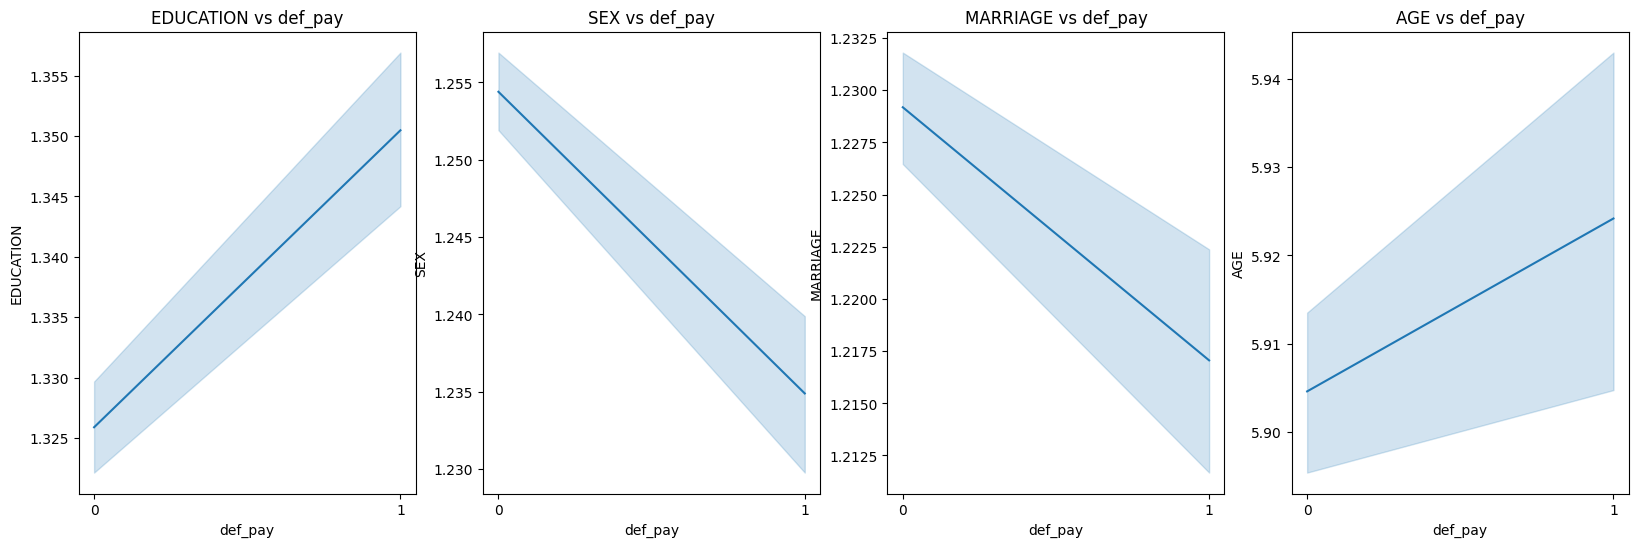

In [42]:
list1=['EDUCATION','SEX','MARRIAGE','AGE']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='def_pay',y=item,data=df)
  plt.title(f'{item} vs def_pay')

In [43]:
final_df = pd.concat([cat_df,num_df],axis=1)

In [44]:
x=df.drop('def_pay',axis=1)
y=df['def_pay']

In [45]:
sc = StandardScaler()

In [46]:
transformed_array = sc.fit_transform(final_df)

In [47]:
new_df = pd.DataFrame(transformed_array, columns=list(final_df.columns))
new_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(24000, 23)
(6000, 23)


In [49]:
X_train.value_counts()

LIMIT_BAL   SEX       EDUCATION  MARRIAGE  AGE       PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1    PAY_AMT2    PAY_AMT3   PAY_AMT4  PAY_AMT5  PAY_AMT6
141.421356  1.000000  1.414214   1.414214  4.898979   2      2      4      4      4      4     1650.0     1650.0     1650.0     1650.0     1650.0     1650.0     0.000000    0.000000    0.000000   0.0       0.0       0.0         3
600.000000  1.414214  1.000000   1.414214  5.196152   1     -2     -2     -2     -2     -2     0.0        0.0        0.0        0.0        0.0        0.0        0.000000    0.000000    0.000000   0.0       0.0       0.0         3
608.276253  1.000000  1.000000   1.000000  6.324555   1     -2     -2     -2     -2     -2     0.0        0.0        0.0        0.0        0.0        0.0        0.000000    0.000000    0.000000   0.0       0.0       0.0         2
600.000000  1.414214  1.000000   1.414214  5.385165   1     -2     -2     -2     -2  

In [52]:
y_train.value_counts()

def_pay
0    18661
1     5339
Name: count, dtype: int64

In [54]:
y_test.value_counts()

def_pay
0    4703
1    1297
Name: count, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression( max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [56]:
clf.intercept_

array([-0.01299739])

In [57]:
clf.coef_

array([[-3.35487569e-04, -2.50877871e-02, -2.64604616e-02,
        -3.02864480e-02, -3.48865026e-02,  2.30098341e-01,
         1.09980406e-01,  9.26319331e-02,  8.61141763e-02,
         8.83426745e-02,  7.77575789e-02, -7.92728831e-06,
         4.30284525e-06,  3.70698932e-06,  3.93428513e-06,
        -4.03462711e-07, -4.46263595e-07, -8.04453109e-03,
        -7.31104597e-03, -4.00317984e-03, -1.03175270e-06,
         1.39992502e-06, -1.66834701e-06]])

In [58]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [59]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [60]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8004166666666667
The accuracy on test data is  0.807


In [61]:
logistic = LogisticRegression()

In [62]:
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
accu_train = []
accu_test = []

for train_index, test_index in skf.split(x, y):
	train_index = list(train_index)
	test_index = list(test_index)

	print(train_index)
	print(test_index)

	print(y.iloc[train_index].value_counts())
	print(y.iloc[test_index].value_counts())

	x_train_fold = x.iloc[train_index]
	x_test_fold = x.iloc[test_index]
	y_train_fold = y.iloc[train_index]
	y_test_fold = y.iloc[test_index]

	logistic.fit(x_train_fold, y_train_fold)

	train_class_preds = logistic.predict(x_train_fold)
	test_class_preds = logistic.predict(x_test_fold)

	accu_train.append(accuracy_score(train_class_preds,y_train_fold))
	accu_test.append(accuracy_score(test_class_preds,y_test_fold))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 59, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 107, 110, 111, 112, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 146, 148, 150, 151, 154, 155, 156, 157, 158, 161, 162, 164, 165, 166, 167, 169, 170, 171, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 186, 187, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 242, 243, 246, 248, 249, 250, 251, 252, 254, 256, 259, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 2

In [63]:
print('List of train accuracy:', accu_train)
print('\nList of test accuracy:', accu_test)
print('\nMaximum train Accuracy That can be obtained from this model is:',
	max(accu_train)*100, '%')
print('\nMaximum test Accuracy That can be obtained from this model is:',
	max(accu_test)*100, '%')
print('\nMinimum train Accuracy:',
	min(accu_train)*100, '%')
print('\nMinimum test Accuracy:',
	min(accu_test)*100, '%')
print('\nOverall Train Accuracy:',
	(sum(accu_train)/len(accu_train))*100, '%')
print('\nOverall Test Accuracy:',
	(sum(accu_test)/len(accu_test))*100, '%')

List of train accuracy: [0.7787916666666667, 0.7792916666666667, 0.7792083333333333, 0.77875, 0.7787083333333333]

List of test accuracy: [0.7781666666666667, 0.779, 0.7793333333333333, 0.7786666666666666, 0.7788333333333334]

Maximum train Accuracy That can be obtained from this model is: 77.92916666666667 %

Maximum test Accuracy That can be obtained from this model is: 77.93333333333334 %

Minimum train Accuracy: 77.87083333333334 %

Minimum test Accuracy: 77.81666666666666 %

Overall Train Accuracy: 77.89500000000001 %

Overall Test Accuracy: 77.88000000000001 %


Random_Forest

In [64]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [65]:
y_pred_train1=rf_model.predict(X_train)
y_pred_test1=rf_model.predict(X_test)

In [66]:
y_pred_test1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [67]:
print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.9995833333333334
The precision of training set =  [0.99962497 0.99943768]
The recall of training set =  [0.99983924 0.99868889]
The f1 score of training set =  [0.99973209 0.99906314]
The confusion matrix of training set = 
 [[18658     3]
 [    7  5332]]


In [68]:

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.8221666666666667
The precision of test set =  [0.84734429 0.65013055]
The recall of test set =  [0.9430151  0.38396299]
The f1 score of test set =  [0.89262353 0.48279205]
The confusion matrix of test set = 
 [[4435  268]
 [ 799  498]]


In [69]:
dict1={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=pd.DataFrame(dict1,index=[0])

In [70]:
dict2={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=pd.DataFrame(dict2,index=[0])

In [71]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(50,200,10,dtype='int64'))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(40,80,10,dtype='int64'))

# Max Features
max_features=['auto','log2']

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_features':max_features}

In [72]:
rf_random = RandomizedSearchCV(estimator=rf_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [12, 14, 16, 18, 20, 22,
                                                      24, 26, 28],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [40, 50, 60, 70],
                                        'min_samples_split': [50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190],
                                        'n_estimators': [80, 100, 120, 140, 160,
                                                         180]},
                   random_state=0, scoring='accuracy')

In [73]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=18, max_features='log2', min_samples_leaf=40,
                       min_samples_split=190, n_estimators=140, random_state=0)

In [74]:
rf_random.best_params_

{'n_estimators': 140,
 'min_samples_split': 190,
 'min_samples_leaf': 40,
 'max_features': 'log2',
 'max_depth': 18}

In [75]:
rf_optimal_model1=rf_random.best_estimator_

In [76]:
y_pred_train2=rf_optimal_model1.predict(X_train)
y_pred_test2=rf_optimal_model1.predict(X_test)

In [77]:
y_pred_test2

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [78]:

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.8216666666666667
The precision of training set =  [0.83867929 0.69122427]
The recall of training set =  [0.95418252 0.3584941 ]
The f1 score of training set =  [0.89271032 0.4721263 ]
The confusion matrix of training set = 
 [[17806   855]
 [ 3425  1914]]


In [79]:
print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.8275
The precision of test set =  [0.84370315 0.69728916]
The recall of test set =  [0.95726132 0.35697764]
The f1 score of test set =  [0.89690208 0.47220806]
The confusion matrix of test set = 
 [[4502  201]
 [ 834  463]]


In [80]:
dict1={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
training_df=training_df._append(dict1,ignore_index=True)

In [81]:

dict2={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
training_df=training_df._append(dict1,ignore_index=True)

In [82]:
xgb_model=XGBClassifier(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [83]:
y_pred_train4=xgb_model.predict(X_train)
y_pred_test4=xgb_model.predict(X_test)

In [84]:

y_pred_test4

array([1, 0, 0, ..., 0, 1, 0])

In [85]:
print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train4))
print('The precision of training set = ',precision_score(y_train,y_pred_train4,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train4,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train4,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train4))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.8854583333333333
The precision of training set =  [0.8864387  0.87954279]
The recall of training set =  [0.97797546 0.56209028]
The f1 score of training set =  [0.92996    0.68586447]
The confusion matrix of training set = 
 [[18250   411]
 [ 2338  3001]]


In [86]:
print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test4))
print('The precision of test set = ',precision_score(y_test,y_pred_test4,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test4,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test4,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test4))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.8203333333333334
The precision of test set =  [0.84477839 0.6473755 ]
The recall of test set =  [0.94429088 0.37085582]
The f1 score of test set =  [0.89176707 0.47156863]
The confusion matrix of test set = 
 [[4441  262]
 [ 816  481]]


In [87]:

dict1={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train4),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train4,average=None),decimals=2))],
       'Comments':'Best of all model'}
training_df=training_df._append(dict1,ignore_index=True)

In [88]:


dict2={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test4),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test4,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test4,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=test_df._append(dict2,ignore_index=True)

In [89]:
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# min childs weight
min_child_weight=list(np.linspace(10,20,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.6] 

# Hyperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [90]:
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,scoring='accuracy',n_jobs=-1,random_state=0)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  2],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                                                          0.13, 0.14],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_child_weight': [10],
                                        'n_estimators': [5, 7, 9, 11, 13],
                                        'subsample': [0.3, 0.5, 0.6]},
                   random_state=0, scoring='accuracy')

In [91]:
xgb_random.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12000000000000001,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [92]:


xgb_random.best_params_

{'subsample': 0.5,
 'n_estimators': 13,
 'min_child_weight': 10,
 'max_depth': 14,
 'learning_rate': 0.12000000000000001,
 'gamma': 0}

In [93]:
xgb_optimal_model1=xgb_random.best_estimator_

In [94]:

y_pred_train5=xgb_optimal_model1.predict(X_train)
y_pred_test5=xgb_optimal_model1.predict(X_test)

In [95]:
y_pred_test5

array([0, 0, 0, ..., 0, 1, 0])

In [96]:
print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',round(accuracy_score(y_train,y_pred_train5),2))
print('The precision of training set = ',precision_score(y_train,y_pred_train5,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train5,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train5,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train5))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.83
The precision of training set =  [0.83661308 0.76615646]
The recall of training set =  [0.97052677 0.33751639]
The f1 score of training set =  [0.89860825 0.46859966]
The confusion matrix of training set = 
 [[18111   550]
 [ 3537  1802]]


In [97]:
print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',round(accuracy_score(y_test,y_pred_test5),2))
print('The precision of test set = ',precision_score(y_test,y_pred_test5,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test5,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test5,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test5))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.82
The precision of test set =  [0.83615611 0.7165493 ]
The recall of test set =  [0.96576653 0.31380108]
The f1 score of test set =  [0.89629995 0.43646113]
The confusion matrix of test set = 
 [[4542  161]
 [ 890  407]]


In [98]:

dict1={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train5),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train5,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train5,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train5,average=None),decimals=2))],
       'Comments':'Best of all model'}
training_df=training_df._append(dict1,ignore_index=True)

In [99]:
dict2={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test5),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test5,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test5,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test5,average=None),decimals=2))],
       'Comments':'Best of all model'}
test_df=test_df._append(dict2,ignore_index=True)

In [100]:
training_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,1.00,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]",Possible overfitting
1,Random Forest - After hyperparameter tuning,0.82,"[[0.84, 0.69]]","[[0.95, 0.36]]","[[0.89, 0.47]]",Reduced overfitting
2,Random Forest - After hyperparameter tuning,0.82,"[[0.84, 0.69]]","[[0.95, 0.36]]","[[0.89, 0.47]]",Reduced overfitting
3,XGBoost - After hyperparameter tuning,0.89,"[[0.89, 0.88]]","[[0.98, 0.56]]","[[0.93, 0.69]]",Best of all model
4,XGBoost - After hyperparameter tuning,0.83,"[[0.84, 0.77]]","[[0.97, 0.34]]","[[0.9, 0.47]]",Best of all model


In [101]:
test_df

,Model,Accuracy,Precision,Recall,F1_score,Comments
0,Random Forest - Before hyperparameter tuning,0.82,"[0.85, 0.65]","[0.94, 0.38]","[0.89, 0.48]",Possible overfitting
1,XGBoost - Before hyperparameter tuning,0.82,"[[0.84, 0.65]]","[[0.94, 0.37]]","[[0.89, 0.47]]",Possible overfitting
2,XGBoost - After hyperparameter tuning,0.82,"[[0.84, 0.72]]","[[0.97, 0.31]]","[[0.9, 0.44]]",Best of all model
